In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('ipo_scoop.csv', usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], skiprows=2, names=['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price', 'first_day_close', 'first_day_pctchg', 'dollar_change_open', 'dollar_change_close', 'star_rating', 'performed'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 12 columns):
date                   3123 non-null object
issuer                 3123 non-null object
symbol                 3123 non-null object
managers               3123 non-null object
offer_price            3123 non-null object
open_price             3123 non-null object
first_day_close        3123 non-null object
first_day_pctchg       3123 non-null object
dollar_change_open     3123 non-null object
dollar_change_close    3123 non-null object
star_rating            3123 non-null object
performed              357 non-null object
dtypes: object(12)
memory usage: 294.6+ KB


In [5]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed
0,2/16/18,Farmmi,FAMI,ViewTrade Securities,$4.00,$4.40,$6.18,54.50%,$0.40,$2.18,N/C,NaN
1,3/16/18,Senmiao Technology,AIHS,ViewTrade Securities,$4.00,$5.51,$5.56,39.00%,$1.51,$1.56,1,Missed
2,3/20/18,Golden Bull,DNJR,ViewTrade Securities,$4.00,$5.20,$4.62,15.50%,$1.20,$0.62,N/C,NaN
3,2/14/18,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,$5.00,$5.00,$4.38,-12.40%,$0.00,-$0.62,1,NaN
4,2/1/18,One Stop Systems,OSS,Roth Capital Partners,$5.00,$5.55,$4.88,-2.40%,$0.55,-$0.12,1,NaN


In [6]:
df = df.applymap(lambda x: x if not '$' in str(x) else x.replace('$', ''))

In [7]:
df = df.applymap(lambda x: x if not '%' in str(x) else x.replace('%', ''))

In [8]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed
0,2/16/18,Farmmi,FAMI,ViewTrade Securities,4.00,4.40,6.18,54.50,0.40,2.18,N/C,NaN
1,3/16/18,Senmiao Technology,AIHS,ViewTrade Securities,4.00,5.51,5.56,39.00,1.51,1.56,1,Missed
2,3/20/18,Golden Bull,DNJR,ViewTrade Securities,4.00,5.20,4.62,15.50,1.20,0.62,N/C,NaN
3,2/14/18,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.00,5.00,4.38,-12.40,0.00,-0.62,1,NaN
4,2/1/18,One Stop Systems,OSS,Roth Capital Partners,5.00,5.55,4.88,-2.40,0.55,-0.12,1,NaN


In [9]:
df.date = pd.to_datetime(df.date)

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 120-11-01 00:00:00

In [36]:
df[df['date'] == '11/120']

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 120-11-01 00:00:00

In [37]:
df.loc[1258, 'date'] = '2012-11-20'

In [38]:
df['date'] = pd.to_datetime(df['date'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
date                   3123 non-null datetime64[ns]
issuer                 3123 non-null object
symbol                 3123 non-null object
managers               3123 non-null object
offer_price            3123 non-null float64
open_price             3123 non-null float64
first_day_close        3123 non-null float64
first_day_pctchg       3123 non-null float64
dollar_change_open     3123 non-null float64
dollar_change_close    3123 non-null float64
star_rating            3123 non-null float64
performed              357 non-null object
dollar_chg_opencls     3123 non-null float64
pct_chg_opencls        3123 non-null float64
dtypes: datetime64[ns](1), float64(9), object(4)
memory usage: 343.7+ KB


In [40]:
df['offer_price'] = df['offer_price'].astype('float')

In [41]:
df['open_price'] = df['open_price'].astype('float')
df['first_day_close'] = df['first_day_close'].astype('float')

In [42]:
df.columns

Index(['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price',
       'first_day_close', 'first_day_pctchg', 'dollar_change_open',
       'dollar_change_close', 'star_rating', 'performed', 'dollar_chg_opencls',
       'pct_chg_opencls'],
      dtype='object')

In [43]:
df.replace('N/C', 0, inplace=True)

In [44]:
for col in df.columns[4:11]:
    df[col] = df[col].astype('float')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
date                   3123 non-null datetime64[ns]
issuer                 3123 non-null object
symbol                 3123 non-null object
managers               3123 non-null object
offer_price            3123 non-null float64
open_price             3123 non-null float64
first_day_close        3123 non-null float64
first_day_pctchg       3123 non-null float64
dollar_change_open     3123 non-null float64
dollar_change_close    3123 non-null float64
star_rating            3123 non-null float64
performed              357 non-null object
dollar_chg_opencls     3123 non-null float64
pct_chg_opencls        3123 non-null float64
dtypes: datetime64[ns](1), float64(9), object(4)
memory usage: 343.7+ KB


### Opening Day Change

In [46]:
df.groupby(df.date.dt.year)['first_day_pctchg'].mean()

date
2000.0    35.562278
2001.0    12.761489
2002.0     7.247043
2003.0    11.945000
2004.0    10.703276
2005.0     9.910752
2006.0     9.988270
2007.0    11.521406
2008.0     2.318085
2009.0     7.175738
2010.0     8.654875
2011.0     9.044406
2012.0    11.981918
2013.0    16.352652
2014.0    12.363160
2015.0    13.947341
2016.0    10.979623
2017.0    10.537348
2018.0    14.417569
Name: first_day_pctchg, dtype: float64

In [47]:
mean_year_first = df.groupby(df.date.dt.year)['first_day_pctchg'].mean()

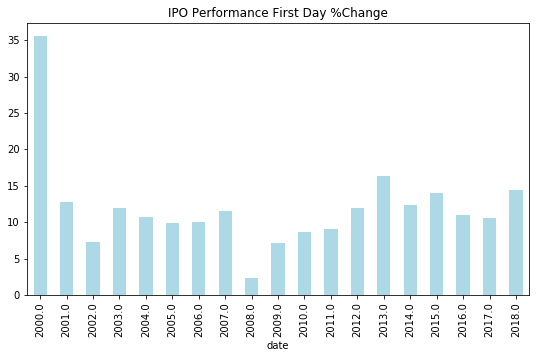

In [48]:
%matplotlib inline
mean_year_first.plot(kind = 'bar', color = 'lightblue', figsize = (9, 5), title = 'IPO Performance First Day %Change')

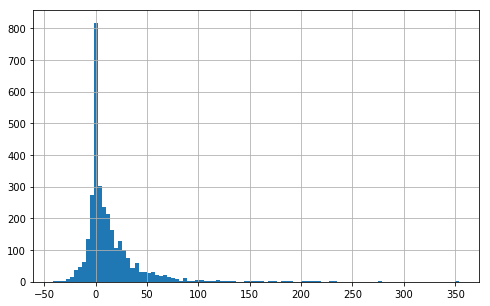

In [49]:
df.first_day_pctchg.hist(bins = 100, figsize = (8, 5))

In [50]:
df['dollar_chg_opencls'] = df['dollar_change_close'] - df['dollar_change_open']

In [51]:
df['pct_chg_opencls'] = (df['dollar_chg_opencls']/df['open_price']) * 100

In [52]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,54.5,0.40,2.18,0.0,NaN,1.78,40.454545
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,39.0,1.51,1.56,1.0,Missed,0.05,0.907441
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,15.5,1.20,0.62,0.0,NaN,-0.58,-11.153846
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-12.4,0.00,-0.62,1.0,NaN,-0.62,-12.400000
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-2.4,0.55,-0.12,1.0,NaN,-0.67,-12.072072


In [53]:
df.pct_chg_opencls.describe()

count    3123.000000
mean        1.379582
std        10.885217
min       -49.281222
25%        -2.860242
50%         0.000000
75%         4.000000
max       159.417476
Name: pct_chg_opencls, dtype: float64

In [54]:
df[df.pct_chg_opencls < -98]

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls


In [55]:
df.loc[2218, 'dollar_change_open'] = 0.09

In [56]:
df.iloc[2218]

date                      2005-04-18 00:00:00
issuer                 Terra Nova Acquisition
symbol                                  TNVAU
managers                    EarlyBird Capital
offer_price                                 6
open_price                               6.09
first_day_close                          6.22
first_day_pctchg                         3.67
dollar_change_open                       0.09
dollar_change_close                      0.22
star_rating                                 1
performed                                 NaN
dollar_chg_opencls                       0.13
pct_chg_opencls                       2.13465
Name: 2218, dtype: object

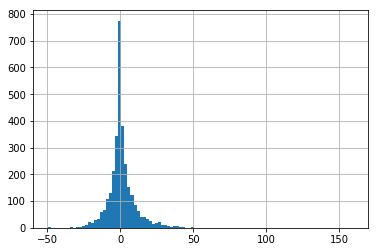

In [57]:
df.pct_chg_opencls.hist(bins= 100)

In [58]:
df[df.date >= '2018']['dollar_chg_opencls'].describe()

count    144.000000
mean       0.355833
std        2.476673
min       -6.260000
25%       -0.652500
50%        0.000000
75%        0.567500
max       14.750000
Name: dollar_chg_opencls, dtype: float64

In [59]:
df[df.date >= '2018']['dollar_chg_opencls'].sum()

51.24000000000001

### Feature Engineering



In [60]:
sp = pd.read_csv('SPY.csv')

In [61]:
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-16,279.640015,279.799988,278.839996,279.339996,279.339996,48201000
1,2018-07-17,278.470001,280.910004,278.410004,280.470001,280.470001,52315500
2,2018-07-18,280.559998,281.179993,280.059998,281.059998,281.059998,44593500
3,2018-07-19,280.309998,280.739990,279.459991,280.000000,280.000000,61412100
4,2018-07-20,279.769989,280.480011,279.500000,279.679993,279.679993,82337700


In [62]:
sp.sort_values('Date', inplace = True)
sp.reset_index(drop= True, inplace = True)

In [63]:
sp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-16,279.640015,279.799988,278.839996,279.339996,279.339996,48201000
1,2018-07-17,278.470001,280.910004,278.410004,280.470001,280.470001,52315500
2,2018-07-18,280.559998,281.179993,280.059998,281.059998,281.059998,44593500
3,2018-07-19,280.309998,280.739990,279.459991,280.000000,280.000000,61412100
4,2018-07-20,279.769989,280.480011,279.500000,279.679993,279.679993,82337700
5,2018-07-23,279.450012,280.429993,279.059998,280.200012,280.200012,47047600
6,2018-07-24,281.790009,282.559998,280.630005,281.609985,281.609985,68026900
7,2018-07-25,281.329987,284.369995,281.279999,284.010010,284.010010,78882900
8,2018-07-26,283.200012,284.109985,283.089996,283.339996,283.339996,57919500
9,2018-07-27,283.709991,283.820007,280.380005,281.420013,281.420013,76768700


In [64]:
sp['day_ago'] = sp.Date.shift(periods=1)
sp['week_ago'] = sp.Date.shift(periods = 7)

In [65]:
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day_ago,week_ago
0,2018-07-16,279.640015,279.799988,278.839996,279.339996,279.339996,48201000,NaN,NaN
1,2018-07-17,278.470001,280.910004,278.410004,280.470001,280.470001,52315500,2018-07-16,NaN
2,2018-07-18,280.559998,281.179993,280.059998,281.059998,281.059998,44593500,2018-07-17,NaN
3,2018-07-19,280.309998,280.739990,279.459991,280.000000,280.000000,61412100,2018-07-18,NaN
4,2018-07-20,279.769989,280.480011,279.500000,279.679993,279.679993,82337700,2018-07-19,NaN


In [66]:
sp['day_ago_close'] = sp.Close.shift(periods = 1)

In [67]:
sp['week_ago_close'] = sp.Close.shift(periods = 7)

In [68]:
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day_ago,week_ago,day_ago_close,week_ago_close
0,2018-07-16,279.640015,279.799988,278.839996,279.339996,279.339996,48201000,NaN,NaN,NaN,NaN
1,2018-07-17,278.470001,280.910004,278.410004,280.470001,280.470001,52315500,2018-07-16,NaN,279.339996,NaN
2,2018-07-18,280.559998,281.179993,280.059998,281.059998,281.059998,44593500,2018-07-17,NaN,280.470001,NaN
3,2018-07-19,280.309998,280.739990,279.459991,280.000000,280.000000,61412100,2018-07-18,NaN,281.059998,NaN
4,2018-07-20,279.769989,280.480011,279.500000,279.679993,279.679993,82337700,2018-07-19,NaN,280.000000,NaN


In [69]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
Date              24 non-null object
Open              24 non-null float64
High              24 non-null float64
Low               24 non-null float64
Close             24 non-null float64
Adj Close         24 non-null float64
Volume            24 non-null int64
day_ago           23 non-null object
week_ago          17 non-null object
day_ago_close     23 non-null float64
week_ago_close    17 non-null float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.1+ KB


In [70]:
sp['chg'] = ((sp.day_ago_close - sp.week_ago_close)/sp.week_ago_close) * 100

In [71]:
sp.chg.describe()

count    17.000000
mean      0.436672
std       0.882171
min      -1.330621
25%      -0.259985
50%       0.403274
75%       1.144198
max       2.011064
Name: chg, dtype: float64

In [72]:
sp.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,day_ago,week_ago,day_ago_close,week_ago_close,chg
0,2018-07-16,279.640015,279.799988,278.839996,279.339996,279.339996,48201000,NaN,NaN,NaN,NaN,NaN
1,2018-07-17,278.470001,280.910004,278.410004,280.470001,280.470001,52315500,2018-07-16,NaN,279.339996,NaN,NaN
2,2018-07-18,280.559998,281.179993,280.059998,281.059998,281.059998,44593500,2018-07-17,NaN,280.470001,NaN,NaN
3,2018-07-19,280.309998,280.739990,279.459991,280.000000,280.000000,61412100,2018-07-18,NaN,281.059998,NaN,NaN
4,2018-07-20,279.769989,280.480011,279.500000,279.679993,279.679993,82337700,2018-07-19,NaN,280.000000,NaN,NaN
5,2018-07-23,279.450012,280.429993,279.059998,280.200012,280.200012,47047600,2018-07-20,NaN,279.679993,NaN,NaN
6,2018-07-24,281.790009,282.559998,280.630005,281.609985,281.609985,68026900,2018-07-23,NaN,280.200012,NaN,NaN
7,2018-07-25,281.329987,284.369995,281.279999,284.010010,284.010010,78882900,2018-07-24,2018-07-16,281.609985,279.339996,0.812626
8,2018-07-26,283.200012,284.109985,283.089996,283.339996,283.339996,57919500,2018-07-25,2018-07-17,284.010010,280.470001,1.262170
9,2018-07-27,283.709991,283.820007,280.380005,281.420013,281.420013,76768700,2018-07-26,2018-07-18,283.339996,281.059998,0.811214


In [73]:
df['sp_close_open_chg_pct'] = sp.chg

In [74]:
df['sp_close_open_chg_pct'].describe()

count    17.000000
mean      0.436672
std       0.882171
min      -1.330621
25%      -0.259985
50%       0.403274
75%       1.144198
max       2.011064
Name: sp_close_open_chg_pct, dtype: float64

In [75]:
df.head(10)

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,sp_close_open_chg_pct
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.00,4.40,6.18,54.50,0.40,2.18,0.0,NaN,1.78,40.454545,NaN
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.00,5.51,5.56,39.00,1.51,1.56,1.0,Missed,0.05,0.907441,NaN
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.00,5.20,4.62,15.50,1.20,0.62,0.0,NaN,-0.58,-11.153846,NaN
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.00,5.00,4.38,-12.40,0.00,-0.62,1.0,NaN,-0.62,-12.400000,NaN
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.00,5.55,4.88,-2.40,0.55,-0.12,1.0,NaN,-0.67,-12.072072,NaN
5,2018-03-29,Genprex,GNPX,Network 1 Financial Securities,5.00,4.64,4.70,-6.00,-0.36,-0.30,1.0,NaN,0.06,1.293103,NaN
6,2018-06-27,HyreCar,HYRE,Network 1 Financial Securities,5.00,5.55,5.10,2.00,0.55,0.10,1.0,NaN,-0.45,-8.108108,NaN
7,2018-07-27,Adial Pharmaceuticals,ADIL,Joseph Gunnar & Co.,5.00,4.00,4.05,-19.00,-1.00,-0.95,1.0,NaN,0.05,1.250000,0.812626
8,2018-05-24,CLPS Incorporation,CLPS,Benchmark/ Cuttone,5.25,5.75,5.51,4.95,0.50,0.26,0.0,NaN,-0.24,-4.173913,1.262170
9,2018-06-28,Entera Bio Ltd.,ENTX,Maxim Group,8.00,7.30,6.28,-21.50,-0.70,-1.72,0.0,NaN,-1.02,-13.972603,0.811214


In [76]:
df.managers[:10]

0              ViewTrade Securities
1              ViewTrade Securities
2              ViewTrade Securities
3        Piper Jaffray/ Oppenheimer
4             Roth Capital Partners
5    Network 1 Financial Securities
6    Network 1 Financial Securities
7               Joseph Gunnar & Co.
8                Benchmark/ Cuttone
9                      Maxim Group 
Name: managers, dtype: object

In [77]:
df['lead_mgr'] = df['managers'].astype('str').map(lambda x:x.split('/')[0])

In [78]:
df['lead_mgr'].head()

0     ViewTrade Securities
1     ViewTrade Securities
2     ViewTrade Securities
3            Piper Jaffray
4    Roth Capital Partners
Name: lead_mgr, dtype: object

In [79]:
df.loc[df['lead_mgr'].str.contains('ViewTrade'), 'lead_mgr'] = 'viewtrade securities'

In [80]:
df['lead_mgr'].head()

0     viewtrade securities
1     viewtrade securities
2     viewtrade securities
3            Piper Jaffray
4    Roth Capital Partners
Name: lead_mgr, dtype: object

In [81]:
df.lead_mgr.unique()[:5]

array(['viewtrade securities', 'Piper Jaffray', 'Roth Capital Partners',
       'Network 1 Financial Securities', 'Joseph Gunnar & Co.'],
      dtype=object)

In [82]:
df.columns

Index(['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price',
       'first_day_close', 'first_day_pctchg', 'dollar_change_open',
       'dollar_change_close', 'star_rating', 'performed', 'dollar_chg_opencls',
       'pct_chg_opencls', 'sp_close_open_chg_pct', 'lead_mgr'],
      dtype='object')

In [83]:
df['gap_open_pct'] = (df['dollar_change_open'].astype('float')/df['open_price'].astype('float'))*100

In [84]:
df['open_to_close_pct'] = ((df['dollar_change_close'].astype('float') - df['dollar_change_open'].astype('float'))/df['open_price'].astype('float')) * 100

In [85]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,sp_close_open_chg_pct,lead_mgr,gap_open_pct,open_to_close_pct
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,54.5,0.40,2.18,0.0,NaN,1.78,40.454545,NaN,viewtrade securities,9.090909,40.454545
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,39.0,1.51,1.56,1.0,Missed,0.05,0.907441,NaN,viewtrade securities,27.404719,0.907441
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,15.5,1.20,0.62,0.0,NaN,-0.58,-11.153846,NaN,viewtrade securities,23.076923,-11.153846
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-12.4,0.00,-0.62,1.0,NaN,-0.62,-12.400000,NaN,Piper Jaffray,0.000000,-12.400000
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-2.4,0.55,-0.12,1.0,NaN,-0.67,-12.072072,NaN,Roth Capital Partners,9.909910,-12.072072


In [86]:
df.columns

Index(['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price',
       'first_day_close', 'first_day_pctchg', 'dollar_change_open',
       'dollar_change_close', 'star_rating', 'performed', 'dollar_chg_opencls',
       'pct_chg_opencls', 'sp_close_open_chg_pct', 'lead_mgr', 'gap_open_pct',
       'open_to_close_pct'],
      dtype='object')

In [87]:
df['month'] = df.date.dt.month

In [88]:
df.month[:5]

0    2.0
1    3.0
2    3.0
3    2.0
4    2.0
Name: month, dtype: float64

In [89]:
df['day'] = df.date.dt.dayofweek

In [90]:
df['day'][:5]

0    4.0
1    4.0
2    1.0
3    2.0
4    3.0
Name: day, dtype: float64

In [91]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,sp_close_open_chg_pct,lead_mgr,gap_open_pct,open_to_close_pct,month,day
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,54.5,0.40,2.18,0.0,NaN,1.78,40.454545,NaN,viewtrade securities,9.090909,40.454545,2.0,4.0
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,39.0,1.51,1.56,1.0,Missed,0.05,0.907441,NaN,viewtrade securities,27.404719,0.907441,3.0,4.0
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,15.5,1.20,0.62,0.0,NaN,-0.58,-11.153846,NaN,viewtrade securities,23.076923,-11.153846,3.0,1.0
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-12.4,0.00,-0.62,1.0,NaN,-0.62,-12.400000,NaN,Piper Jaffray,0.000000,-12.400000,2.0,2.0
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-2.4,0.55,-0.12,1.0,NaN,-0.67,-12.072072,NaN,Roth Capital Partners,9.909910,-12.072072,2.0,3.0


In [92]:
df['day'] = df.day.map({1: 'mon', 2: 'tues', 3: 'weds', 4:'thurs', 5:'fri'   })

In [93]:
df['month'] = df.month.map({1: 'jan', 2: 'feb', 3: 'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8: 'aug', 9: 'sept', 10: 'oct', 11: 'nov', 12: 'dec'})

In [94]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,sp_close_open_chg_pct,lead_mgr,gap_open_pct,open_to_close_pct,month,day
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,54.5,0.40,2.18,0.0,NaN,1.78,40.454545,NaN,viewtrade securities,9.090909,40.454545,feb,thurs
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,39.0,1.51,1.56,1.0,Missed,0.05,0.907441,NaN,viewtrade securities,27.404719,0.907441,mar,thurs
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,15.5,1.20,0.62,0.0,NaN,-0.58,-11.153846,NaN,viewtrade securities,23.076923,-11.153846,mar,mon
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-12.4,0.00,-0.62,1.0,NaN,-0.62,-12.400000,NaN,Piper Jaffray,0.000000,-12.400000,feb,tues
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-2.4,0.55,-0.12,1.0,NaN,-0.67,-12.072072,NaN,Roth Capital Partners,9.909910,-12.072072,feb,weds


### Feature Selection

In [95]:
df.columns

Index(['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price',
       'first_day_close', 'first_day_pctchg', 'dollar_change_open',
       'dollar_change_close', 'star_rating', 'performed', 'dollar_chg_opencls',
       'pct_chg_opencls', 'sp_close_open_chg_pct', 'lead_mgr', 'gap_open_pct',
       'open_to_close_pct', 'month', 'day'],
      dtype='object')

In [96]:
X = pd.get_dummies(df[['month', 'day', 'gap_open_pct', 'dollar_change_open', 'offer_price', 'open_price', 'dollar_chg_opencls']], drop_first = True)

In [97]:
X.head(10)

,gap_open_pct,dollar_change_open,offer_price,open_price,dollar_chg_opencls,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sept,day_mon,day_thurs,day_tues,day_weds
0,9.090909,0.40,4.00,4.40,1.78,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,27.404719,1.51,4.00,5.51,0.05,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,23.076923,1.20,4.00,5.20,-0.58,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0.000000,0.00,5.00,5.00,-0.62,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,9.909910,0.55,5.00,5.55,-0.67,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
5,-7.758621,-0.36,5.00,4.64,0.06,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
6,9.909910,0.55,5.00,5.55,-0.45,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7,-25.000000,-1.00,5.00,4.00,0.05,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
8,8.695652,0.50,5.25,5.75,-0.24,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
9,-9.589041,-0.70,8.00,7.30,-1.02,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [98]:
X.shape

(3142, 20)

In [99]:
X = X[7:]

In [100]:
X.shape

(3135, 20)

In [101]:
X.head()

,gap_open_pct,dollar_change_open,offer_price,open_price,dollar_chg_opencls,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sept,day_mon,day_thurs,day_tues,day_weds
7,-25.000000,-1.0,5.00,4.00,0.05,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
8,8.695652,0.5,5.25,5.75,-0.24,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
9,-9.589041,-0.7,8.00,7.30,-1.02,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
10,5.555556,0.5,8.50,9.00,-0.20,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
11,13.461538,1.4,9.00,10.40,-0.73,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [102]:
X.isnull().sum()

gap_open_pct          19
dollar_change_open    19
offer_price           19
open_price            19
dollar_chg_opencls    19
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sept             0
day_mon                0
day_thurs              0
day_tues               0
day_weds               0
dtype: int64

In [103]:
X.dropna().shape

(3116, 20)

In [104]:
X = X.dropna()

In [105]:
X.columns

Index(['gap_open_pct', 'dollar_change_open', 'offer_price', 'open_price',
       'dollar_chg_opencls', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sept', 'day_mon', 'day_thurs',
       'day_tues', 'day_weds'],
      dtype='object')

### Binary Classification

In [106]:
y = X.dollar_chg_opencls
X = X.drop('dollar_chg_opencls', axis = 1)

X_train, X_test = X[:2800], X[2800:]

In [107]:
X_test.shape

(316, 19)

In [108]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 2807 to 3122
Data columns (total 19 columns):
gap_open_pct          316 non-null float64
dollar_change_open    316 non-null float64
offer_price           316 non-null float64
open_price            316 non-null float64
month_aug             316 non-null uint8
month_dec             316 non-null uint8
month_feb             316 non-null uint8
month_jan             316 non-null uint8
month_jul             316 non-null uint8
month_jun             316 non-null uint8
month_mar             316 non-null uint8
month_may             316 non-null uint8
month_nov             316 non-null uint8
month_oct             316 non-null uint8
month_sept            316 non-null uint8
day_mon               316 non-null uint8
day_thurs             316 non-null uint8
day_tues              316 non-null uint8
day_weds              316 non-null uint8
dtypes: float64(4), uint8(15)
memory usage: 17.0 KB


In [109]:
y[:10]

7     0.05
8    -0.24
9    -1.02
10   -0.20
11   -0.73
12    0.00
13   -0.07
14    0.00
15    0.00
16    0.06
Name: dollar_chg_opencls, dtype: float64

In [110]:
y = y.map(lambda x: 1 if x > 1 else 0)

In [111]:
y_train = y[:2800]
y_test = y[2800:]

In [112]:
y_test.shape

(316,)

In [113]:
y_train[:10]

7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
Name: dollar_chg_opencls, dtype: int64

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [116]:
clf.score(X_test, y_test)

0.6962025316455697

In [127]:
nyse = pd.read_csv('nyse-companylist.csv')

In [128]:
nyse.head()

,Symbol,Name,LastSale,MarketCap,IPOyear,Sector,industry,Summary Quote,Unnamed: 8
0,DDD,3D Systems Corporation,14.30,$1.61B,NaN,Technology,Computer Software: Prepackaged Software,http://www.nasdaq.com/symbol/ddd,NaN
1,MMM,3M Company,172.91,$104B,NaN,Health Care,Medical/Dental Instruments,http://www.nasdaq.com/symbol/mmm,NaN
2,WBAI,500.com Limited,13.47,$558.98M,2013.0,Consumer Services,Services-Misc. Amusement & Recreation,http://www.nasdaq.com/symbol/wbai,NaN
3,WUBA,58.com Inc.,31.93,$4.62B,2013.0,Technology,"Computer Software: Programming, Data Processing",http://www.nasdaq.com/symbol/wuba,NaN
4,AHC,A.H. Belo Corporation,6.20,$134.39M,NaN,Consumer Services,Newspapers/Magazines,http://www.nasdaq.com/symbol/ahc,NaN


In [129]:
nyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3171 entries, 0 to 3170
Data columns (total 9 columns):
Symbol           3171 non-null object
Name             3171 non-null object
LastSale         3101 non-null float64
MarketCap        2495 non-null object
IPOyear          1360 non-null float64
Sector           2197 non-null object
industry         2197 non-null object
Summary Quote    3171 non-null object
Unnamed: 8       0 non-null float64
dtypes: float64(3), object(6)
memory usage: 223.0+ KB


In [131]:
nyse.shape

(3171, 9)

In [132]:
nyse.describe()

,LastSale,IPOyear,Unnamed: 8
count,3101.000000,1360.000000,0.0
mean,37.272406,2007.076471,NaN
std,69.478728,8.172264,NaN
min,0.349800,1985.000000,NaN
25%,13.460000,2002.750000,NaN
50%,23.950000,2010.000000,NaN
75%,39.510000,2014.000000,NaN
max,1547.500000,2016.000000,NaN


In [152]:
nyse.columns

Index(['Symbol', 'Name', 'LastSale', 'MarketCap', 'IPOyear', 'Sector',
       'industry', 'Summary Quote', 'Unnamed: 8'],
      dtype='object')

In [133]:
from sklearn.datasets import make_regression

In [134]:
nysedf = make_regression(n_features=3)

In [135]:
X = nysedf[0][:, 0]
y = nysedf[0][:, 2]

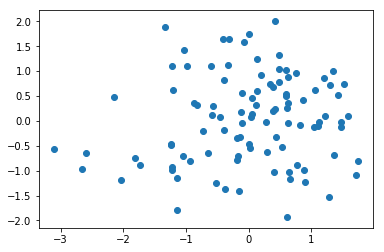

In [136]:
plt.scatter(X, y)

In [137]:
nysedf[0][:5,0]

array([ 0.39525572, -2.1465466 , -0.18285765,  1.42608974,  0.74897965])

In [138]:
nysedf[0][:5, 2]

array([ 0.67835163,  0.47192947, -0.34705669,  0.52421493,  0.96373484])

In [139]:
from sklearn.linear_model import LinearRegression 

In [141]:
lr = LinearRegression()

In [142]:
lr.fit(X.reshape (-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [143]:
y_pred = lr.predict(X.reshape(-1,1))

In [144]:
lr.intercept_

0.03621209022686093

In [145]:
lr.coef_

array([0.0996076])

In [146]:
lr.fit

<bound method LinearRegression.fit of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [147]:
diffs = y - y_pred

In [148]:
np.mean(diffs)

-4.440892098500626e-18

(array([ 3.,  5., 11., 12., 20., 13., 16., 10.,  5.,  5.]),
 array([-2.03186739, -1.63067518, -1.22948298, -0.82829078, -0.42709858,
        -0.02590638,  0.37528582,  0.77647802,  1.17767022,  1.57886242,
         1.98005462]),
 <a list of 10 Patch objects>)

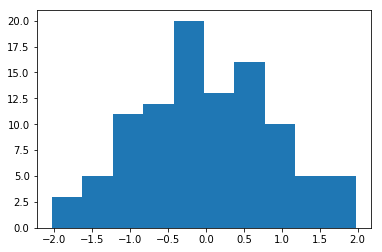

In [149]:
plt.hist(diffs)

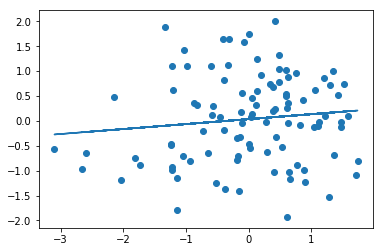

In [150]:
plt.scatter(X, y)
plt.plot(X,y_pred)

In [151]:
np.mean(diffs)

-4.440892098500626e-18

In [153]:
import seaborn as sns 

In [163]:
from sklearn.metrics import mean_squared_error

In [164]:
mse = mean_squared_error(y_pred, y)
rmse = np.sqrt(mse)

In [165]:
print("The mean squared error is :{: 2f}".format(mse), "/nThe RMSE is :{:.2f}".format(rmse))

The mean squared error is : 0.773347 /nThe RMSE is :0.88
